# Representation Learning

Often it is very hard either to find similarities within data or even to classify data as belonging to different labels when the data contains so many features. One particular example are images which may contain millions of pixels. Even low-dimensional data may not be easy to visualize in a 2D plane, so bringing the dominant effects in a 2D plane for visualization is in itself a very helpful starting point.

There are different methods to obtain another view of the data, by performing linear or even non-linear combinations of the data features. The price being paid by such methods is that the new representation of the data may not be that straightforward to digest, loosing therefore some of its scientific interpretation. On the other hand, if one understands the assumptions made in such methods, one can easily imagine the mathematical process required to transform to and from this new view and gain insight from the new view without loosing track of the scientific background.

We are going to go through a few methods of obtaining an alternative view of the data here and what their assumptions might be.

We start by loading the necessary Python modules. If you have not yet installed them, run the following cell to install them with pip:

In [3]:
!pip install numpy scikit-learn pandas matplotlib

In [1]:
import matplotlib.pyplot as plt
%matplotlib inline

import pandas as pd
import numpy as np
from sklearn.decomposition import PCA

Let's generate the fake data now to have something to cluster.

In [2]:
rng = np.random.RandomState(0)
n_samples = 500
cov = [[3, 3], [3, 4]]
data = rng.multivariate_normal(mean=[0, 0], cov=cov, size=n_samples)
data = pd.DataFrame(data, columns=["x", "y"])

Let's print out the dataset read first.

In [3]:
data

x         y
0   -3.123062 -3.267402
1   -2.775958 -0.929101
2   -2.582416 -4.072345
3   -1.492453 -1.920361
4   -0.041529  0.381166
..        ...       ...
495 -0.821492 -0.782416
496  1.197165  1.665481
497 -0.691309 -0.383494
498  0.279317  0.428408
499  2.082251  2.082815

[500 rows x 2 columns]

We can plot this fairly easily using Matplotlib.

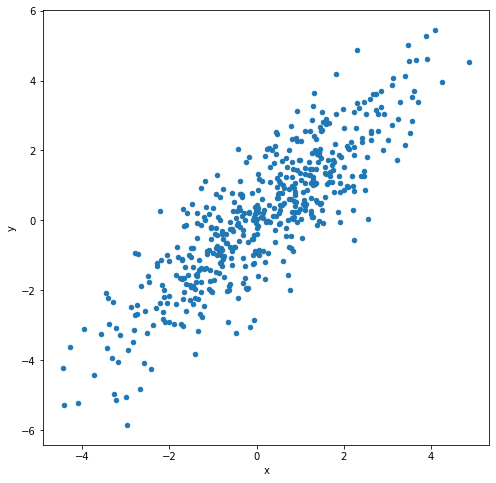

In [4]:
fig, ax = plt.subplots(figsize=(8, 8))
data.plot.scatter(x="x", y="y", alpha=0.3, ax=ax)
ax.set(xlabel="x", ylabel=r"y", title="")
plt.show()

Clearly there is a strong correlation in this data. One could almost predict $y$ using $x$ alone by fitting a line in the $xy$-plane. Therefore, it may be easier to provide a representation on which only one variable is present but retaining the maximum information possible. This is possible using several methods, which rely on several underlying assumptions. Let us start with Principal Component Analysis.



In [5]:
pca = PCA(n_components=2)

In [6]:
pca.fit(data.loc[:, ["x", "y"]])

PCA(n_components=2)

In [7]:
data_t = pca.transform(data.loc[:, ["x", "y"]])

In [8]:
data.loc[:, "pca_0"] = data_t[:, 0]
data.loc[:, "pca_1"] = data_t[:, 1]

We can start by plotting how the data looks like after this transformation.

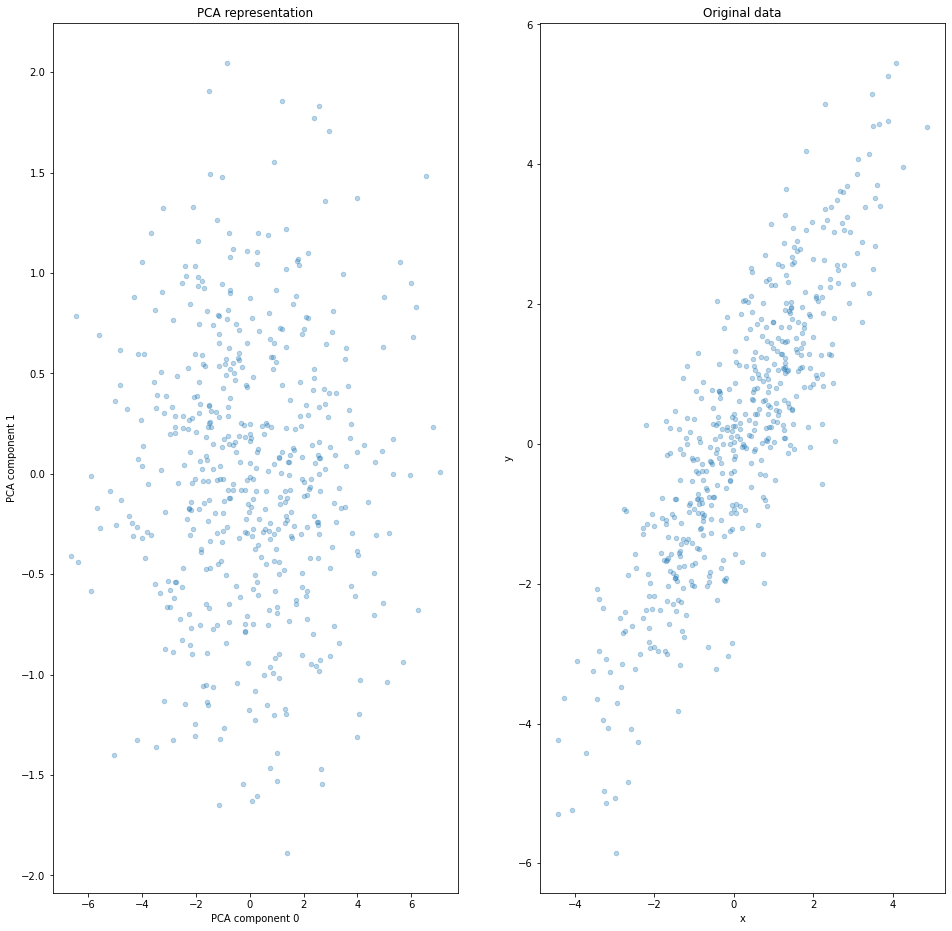

In [12]:
fig, ax = plt.subplots(figsize=(16, 16), ncols=2)
data.plot.scatter(x="pca_0", y="pca_1", alpha=0.3, ax=ax[0])
data.plot.scatter(x="x", y="y", alpha=0.3, ax=ax[1])
ax[0].set(xlabel="PCA component 0", ylabel=r"PCA component 1", title="PCA representation")
ax[1].set(xlabel="x", ylabel=r"y", title="Original data")
plt.show()

It is interesting to understand how many PCA components are necessary to explain the variance of the data. This is easily obtainable from the PCA object.

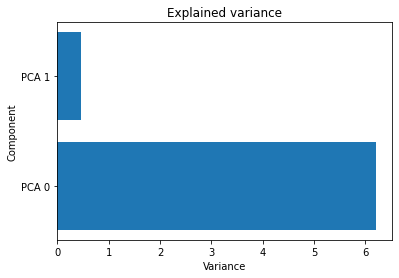

In [15]:
plt.barh(["PCA 0", "PCA 1"], pca.explained_variance_)
plt.gca().set(xlabel="Variance", ylabel="Component", title="Explained variance")
plt.show()

Clearly the zeroth PCA component holds most of the variance and we could therefore use this component to closely determine where a data sample point should be if we dropped the other component. This is equivalent to fitting a line and using the projection of the point in the line to characterize the data, instead of using the two coordinates.

While this may seem superfluous in this simple case, if one has hundreds of variables, PCA provides a simple and almost automatic way to reduce the amount of features being examined, by concentrating most of the variance in a few variables. Which variables to choose, can be decided from the `explained_variance_` attribute.